In [1]:
import pandas as pd  #importing libraries
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing The Dataset

In [2]:
df=pd.read_csv("ratingpredictiondata1.csv")

In [3]:
df

,Unnamed: 0,Rating,Rating Summary,Review
0,0,1,Horrible,There is no stand in this pack.
1,1,1,Worthless,Next day power IC not working
2,2,1,Unsatisfactory,PLEASE DO NOTE THAT: THE TV DOES NOT COME WITH...
3,3,1,Useless product,This model does not come with a table mount.we...
4,4,1,Absolute rubbish!,Picture quality is very bad
...,...,...,...,...
20216,796,4,Very Good,Good
20217,797,4,Good choice,Good product happy ☺️☺️☺️
20218,798,4,Value-for-money,I was using Samsung s20 plus and upgraded to i...
20219,799,4,Good choice,Good deal


The above Dataset, we have gathered the information from one of the most leading website www.flipkart.com. The site is one the major E-Commerce website and has listed various products in each category. The rating, reviews and review summary has been scrapped of various products like phones, smart Tv's, Smart watches and many more. To scrap the data we have used the web scarping tool called Beautiful Soup and Selenium. 

We have gathered around 20221 rows of data and we have extracted information like reviews and review summary as we are supposed to build a model that predicts the rating as the reviews given by the various users. The data we have collected is in a very raw form.

We will be performing various data preprocessing and data cleaning processes on the dataset before passing it to various machine learning models for training and testing purpose.

As we could see we have some unwanted column and some missing values in the dataset and the some of the columns carry text data we will be performing various techniques to convert the data in the desired format.

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True) #droping the column as we already have index

In [5]:
df

,Rating,Rating Summary,Review
0,1,Horrible,There is no stand in this pack.
1,1,Worthless,Next day power IC not working
2,1,Unsatisfactory,PLEASE DO NOTE THAT: THE TV DOES NOT COME WITH...
3,1,Useless product,This model does not come with a table mount.we...
4,1,Absolute rubbish!,Picture quality is very bad
...,...,...,...
20216,4,Very Good,Good
20217,4,Good choice,Good product happy ☺️☺️☺️
20218,4,Value-for-money,I was using Samsung s20 plus and upgraded to i...
20219,4,Good choice,Good deal


In [6]:
df['Rating'].value_counts()  #value counts of each rating

5    7134
4    5801
1    4134
3    2369
2     783
Name: Rating, dtype: int64

In [7]:
df.dtypes #data type of each rating

Rating             int64
Rating Summary    object
Review            object
dtype: object

In [8]:
df.columns #name of each column

Index(['Rating', 'Rating Summary', 'Review'], dtype='object')

In [9]:
df.shape  #the size of the dataset i.e number of columns and rows

(20221, 3)

# Data Preprocessing/Cleaning

In [10]:
df.isnull().sum()   #checking out the null values

Rating             0
Rating Summary    31
Review             0
dtype: int64

In [11]:
df.dropna(inplace=True)  #droping the null values as we have very less null values would prefer to drop the values

In [12]:
df.shape

(20190, 3)

# Various Plotings

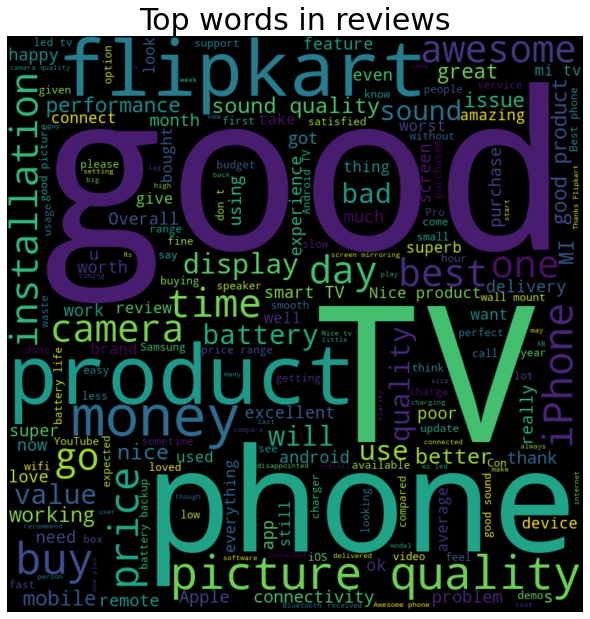

In [13]:
from wordcloud import WordCloud,STOPWORDS    #cretaed the word cloud of the nost often used words in the review column
def wordCloud_generator(df, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(df.values))                      
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show()
wordCloud_generator(df['Review'], title="Top words in reviews")

<AxesSubplot:xlabel='Rating', ylabel='count'>

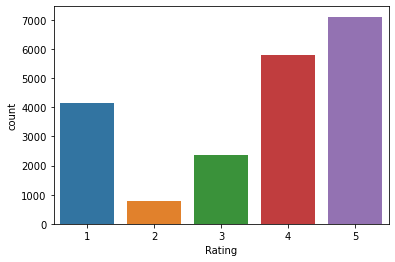

In [14]:
sns.countplot(df['Rating'])  

As we could see here that we we have 5 categories in rating and the dataset is imbalalnced we will be performing SMOTE to balance our dataset.

In [16]:
le=LabelEncoder()   #converting the categorial data into numerical data

name=["Review","Rating Summary"]
for val in name:
    df[val]=le.fit_transform(df[val].astype(str))

In [17]:
df.head()

,Rating,Rating Summary,Review
0,1,205,10480
1,1,408,6766
2,1,354,7993
3,1,360,10733
4,1,23,8401


<AxesSubplot:>

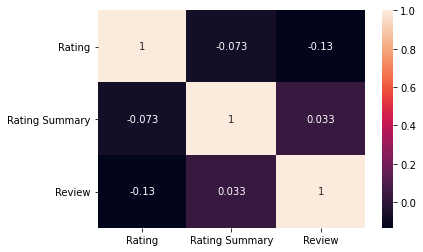

In [25]:
sns.heatmap(df.corr(), annot=True)

From the above heatmap we can see that rating summary and review are positively correlated to each other.

<AxesSubplot:xlabel='Rating Summary', ylabel='Density'>

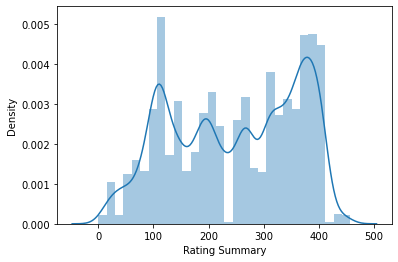

In [22]:
sns.distplot(df['Rating Summary'])

After coverting the textual data into the numeric we could see that data is normarlly distributed.

<AxesSubplot:xlabel='Review', ylabel='Density'>

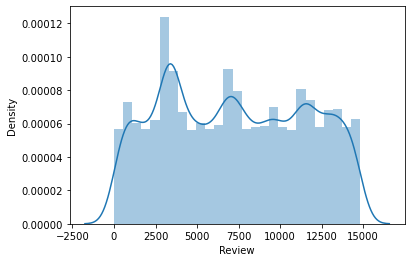

In [24]:
sns.distplot(df['Review'])

After coverting the textual data into the numeric we could see that data is normarlly distributed.

Rating               AxesSubplot(0.125,0.536818;0.110714x0.343182)
Rating Summary    AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Review            AxesSubplot(0.390714,0.536818;0.110714x0.343182)
dtype: object

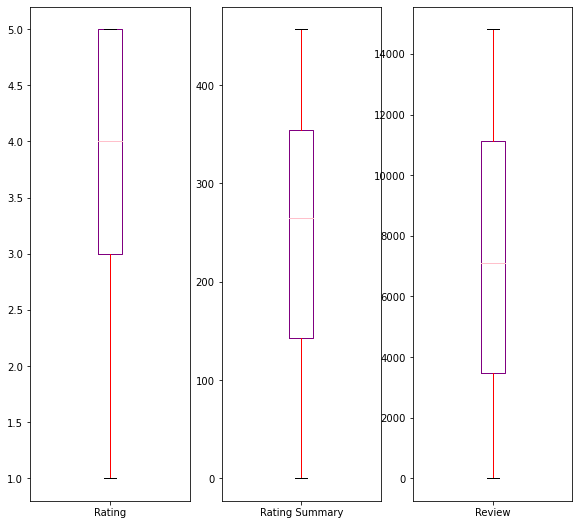

In [19]:
color=dict(boxes="Purple",whiskers="Red",medians="Pink",caps="Black")
df.plot(kind="box",subplots=True,layout=(2,6),figsize=(20,20),color=color)

From the abaove plot we can say that there are no outliers present in the dataset.

In [104]:
df.skew()   #checking the skewness as we could there ie no skewness in the data

Rating           -0.711528
Rating Summary   -0.195251
Review            0.066977
dtype: float64

In [105]:
df.describe() #statistical summary of the dataset

,Rating,Rating Summary,Review
count,20190.000000,20190.000000,20190.000000
mean,3.543635,246.877167,7281.727142
std,1.502900,114.318388,4232.802167
min,1.000000,0.000000,0.000000
25%,3.000000,143.000000,3459.250000
50%,4.000000,264.500000,7097.500000
75%,5.000000,354.000000,11124.750000
max,5.000000,457.000000,14819.000000


# Dividing the Dataset into Independent and Dependent variable

In [107]:
x=df.drop("Rating", axis=1)   #independent variables
x

,Rating Summary,Review
0,205,10480
1,408,6766
2,354,7993
3,360,10733
4,23,8401
...,...,...
20216,371,3292
20217,176,3741
20218,368,5097
20219,176,3458


In [108]:
y=df["Rating"]   #dependent variable
y

0        1
1        1
2        1
3        1
4        1
        ..
20216    4
20217    4
20218    4
20219    4
20220    4
Name: Rating, Length: 20190, dtype: int64

In [109]:
def cal_vif(x):    # calculating variance Inflation Factor
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    return(vif)

In [110]:
cal_vif(x)

,variables,VIF FACTOR
0,Rating Summary,2.676392
1,Review,0.003812


In [111]:
from sklearn.preprocessing import StandardScaler
mn=StandardScaler()  #performing standard scaling to bring them on the same scale.
x=mn.fit_transform(x)
x

array([[-0.36632955,  0.75561104],
       [ 1.40945675, -0.12184361],
       [ 0.9370801 ,  0.16804246],
       ...,
       [ 1.05954812, -0.51615482],
       [-0.62001331, -0.90337835],
       [ 0.53468517, -0.56694985]])

In [119]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()      #SMOTE to balance the target variable.
x_res,y_res=smt.fit_resample(x,y)

In [120]:
y_res.value_counts()

1    7114
2    7114
3    7114
4    7114
5    7114
Name: Rating, dtype: int64

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,roc_auc_score
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

# Performing Algorithm

In [121]:
maxacc=0  #finding the best random state
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=.30,random_state=i)
    lm=LogisticRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxacc:
        maxacc=accu
        maxrs=i
print("best accuracy is",round(maxacc,2),"at random state",maxrs)

best accuracy is 0.33 at random state 62


In [123]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_res,y_res,test_size=.30,random_state=62)

# Logistic Regression

In [137]:
lm=LogisticRegression()
lm.fit(x_train1,y_train1)
pred=lm.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("accuracy score",az)
cl=classification_report(y_test1,pred)
print(cl)
print(confusion_matrix(y_test1,pred))

accuracy score 0.32667978633680067
              precision    recall  f1-score   support

           1       0.34      0.42      0.37      2168
           2       0.00      0.00      0.00      2123
           3       0.35      0.67      0.46      2142
           4       0.35      0.49      0.41      2107
           5       0.24      0.05      0.08      2131

    accuracy                           0.33     10671
   macro avg       0.26      0.33      0.27     10671
weighted avg       0.26      0.33      0.27     10671

[[ 908  136  474  626   24]
 [ 416    0 1082  527   98]
 [ 286    0 1436  198  222]
 [ 505  174  393 1035    0]
 [ 578  154  751  541  107]]


# Decision Tree Classifier

In [130]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train1,y_train1)
pred=dtc.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("accuracy score",az)
cl=classification_report(y_test1,pred)
print(cl)
print(confusion_matrix(y_test1,pred))

accuracy score 0.9834129884734326
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      2168
           2       0.99      0.99      0.99      2123
           3       0.99      0.99      0.99      2142
           4       0.97      0.98      0.98      2107
           5       0.98      0.96      0.97      2131

    accuracy                           0.98     10671
   macro avg       0.98      0.98      0.98     10671
weighted avg       0.98      0.98      0.98     10671

[[2155    3    2    2    6]
 [   5 2104    1    2   11]
 [   7    3 2119    7    6]
 [   8    1    4 2069   25]
 [  11    8    8   57 2047]]


# Random Forest Classifier

In [131]:
rf=RandomForestClassifier()
rf.fit(x_train1,y_train1)
pred=rf.predict(x_test1)
ap=accuracy_score(y_test1,pred)
ap=ap*100
print("Accuracy Score",round(ap,2))
print(classification_report(y_test1,pred))
print(confusion_matrix(y_test1,pred))

Accuracy Score 97.88
              precision    recall  f1-score   support

           1       0.98      0.99      0.98      2168
           2       0.99      0.99      0.99      2123
           3       0.99      0.99      0.99      2142
           4       0.97      0.98      0.97      2107
           5       0.97      0.95      0.96      2131

    accuracy                           0.98     10671
   macro avg       0.98      0.98      0.98     10671
weighted avg       0.98      0.98      0.98     10671

[[2137    3   12    5   11]
 [   7 2101    0    0   15]
 [  14    7 2113    3    5]
 [   6    2    4 2066   29]
 [  19    9   14   61 2028]]


# Ada Boost Classifier

In [132]:
ad=AdaBoostClassifier()
ad.fit(x_train1,y_train1)
pred=ad.predict(x_test1)
ap=accuracy_score(y_test1,pred)
ap=ap*100
print("Accuracy Score",round(ap,2))
print(classification_report(y_test1,pred))
print(confusion_matrix(y_test1,pred))


Accuracy Score 59.89
              precision    recall  f1-score   support

           1       0.51      0.58      0.55      2168
           2       0.59      0.74      0.65      2123
           3       0.71      0.97      0.82      2142
           4       0.64      0.38      0.48      2107
           5       0.50      0.32      0.39      2131

    accuracy                           0.60     10671
   macro avg       0.59      0.60      0.58     10671
weighted avg       0.59      0.60      0.58     10671

[[1264  148  295   96  365]
 [   7 1565  263    4  284]
 [  13   45 2074    6    4]
 [ 827  255  203  804   18]
 [ 356  661   93  337  684]]


# Support Vector Classifier

In [129]:
svc=SVC(kernel='poly')
svc.fit(x_train1,y_train1)
pred=svc.predict(x_test1)
ap=accuracy_score(y_test1,pred)
ap=ap*100
print("Accuracy Score",round(ap,2))
print(classification_report(y_test1,pred))



Accuracy Score 33.73
              precision    recall  f1-score   support

           1       0.45      0.26      0.33      2168
           2       0.34      0.32      0.33      2123
           3       0.37      0.49      0.42      2142
           4       0.30      0.60      0.40      2107
           5       0.15      0.02      0.04      2131

    accuracy                           0.34     10671
   macro avg       0.32      0.34      0.30     10671
weighted avg       0.32      0.34      0.30     10671



# Cross Validation Score

In [133]:
print(cross_val_score(rf,x,y,cv=5).mean())    #random forest classifier

0.945567112431897


In [134]:
print(cross_val_score(dtc,x,y,cv=5).mean())   #decision tree classifier

0.9567112431896978


In [135]:
print(cross_val_score(ad,x,y,cv=5).mean())   #ada boost classifier

0.629024269440317


In [136]:
print(cross_val_score(lm,x,y,cv=5).mean())  #logistic regression

0.41406636948984643


We could see that from the cross validation scores and the accuracy scores of each model we could see that the decisiom Tree Classifier is performing the best and we will plotting the Auc_Roc scores of decison Tree Classifier only.

# AUC_ROC CURVE

In [138]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train1,y_train1)

DecisionTreeClassifier()

In [139]:
probas=dtc.predict_proba(x_test1)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

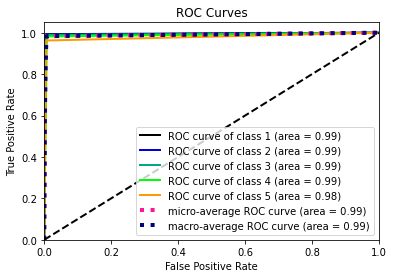

In [140]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test1,probas)

# Hyper Parameter Tunning

In [141]:
parameter={"criterion":['gini','entropy'],     #performing the hyperparameter tunning of the best model
          "splitter":['best','random'],
          "max_features":["auto","sqrt","log2"],
          "min_samples_split":np.arange(2,20),
          "max_depth":np.arange(2,10)}

In [142]:
gcv=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [143]:
gcv.fit(x_train1,y_train1)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'splitter': ['best', 'random']})

In [144]:
gcv.best_params_        #finding out the best parameters

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_split': 17,
 'splitter': 'best'}

# Final Model

In [161]:
final=DecisionTreeClassifier(criterion='entropy',max_depth=90,splitter='best',min_samples_split=17)
final.fit(x_train1,y_train1)
pred=final.predict(x_test1)
acc=accuracy_score(y_test1,pred)
acc1=acc*100
print("Accuracy Score",acc1)
print(classification_report(y_test1,pred))
print(confusion_matrix(y_test1,pred))

Accuracy Score 98.14450379533315
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      2168
           2       0.99      0.99      0.99      2123
           3       0.99      0.99      0.99      2142
           4       0.96      0.98      0.97      2107
           5       0.97      0.96      0.96      2131

    accuracy                           0.98     10671
   macro avg       0.98      0.98      0.98     10671
weighted avg       0.98      0.98      0.98     10671

[[2144    6    6    5    7]
 [   7 2098    1    0   17]
 [   5    3 2123    5    6]
 [   5    3    4 2068   27]
 [   4    7    9   71 2040]]


# Saving the Model

In [162]:
import joblib
joblib.dump(final,"rating.pkl")

['rating.pkl']